# Combining Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Reading datasets
happiness2015 = pd.read_csv("datasets/World_Happiness_2015.csv")
happiness2016 = pd.read_csv("datasets/World_Happiness_2016.csv")

# Adding Year column to the dataframes
for i, df in enumerate([happiness2015, happiness2016]):
    df['Year']=2015+i

In [25]:
# Creating two subsets of first 3 rows
# They have the same dimensions
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

In [26]:
head_2015

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015


In [27]:
head_2016

,Country,Happiness Score,Year
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


The pd.concat() function combines dataframes one of two ways:
1. Stacked on top of the other: 
Axis = 0 (This is the default option)
2. Side by Side: 
Axis = 1

In [28]:
# Stacked (axis=0)
pd.concat([head_2015, head_2016])

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


In [29]:
# Side by side (axis=1)
# The combination is done based on row indices
pd.concat([head_2015, head_2016], axis=1)

,Country,Happiness Score,Year,Country,Happiness Score,Year
0,Switzerland,7.587,2015,Denmark,7.526,2016
1,Iceland,7.561,2015,Switzerland,7.509,2016
2,Denmark,7.527,2015,Iceland,7.501,2016


In [31]:
# What if dataframes have different shapes?
# Adding a row and a column to head_2015

head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

In [32]:
pd.concat([head_2015, head_2016])

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
0,2016,Denmark,7.526,NaN
1,2016,Switzerland,7.509,NaN
2,2016,Iceland,7.501,NaN


Note:
- Standard Error column didn't exist in head_2016, so NaN was filled in the missing values. 
- By default, the concat function will keep ALL of the data, no matter if missing values are created.
- Indices from the original dataframes are kept as it is.

If the indexes aren't meaningful, it's better to reset them. Duplicate indexes could cause errors.
<br>
The ignore_index parameter can be used for this.

In [33]:
pd.concat([head_2015, head_2016], ignore_index=True)

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
4,2016,Denmark,7.526,NaN
5,2016,Switzerland,7.509,NaN
6,2016,Iceland,7.501,NaN


pd.merge() function:
- Can execute high performance database-style joins.
- Unlike the concat function, the merge function only combines dataframes horizontally (axis=1) and can only combine two dataframes at a time.
- We combine dataframes on a key, a shared index or column. Use keys with unique values to avoid duplicating data.

In [34]:
# Creating new subsets of 3 rows
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

In [35]:
three_2015

,Country,Happiness Rank,Year
2,Denmark,3,2015
3,Norway,4,2015
4,Canada,5,2015


In [36]:
three_2016

,Country,Happiness Rank,Year
2,Iceland,3,2016
3,Norway,4,2016
4,Finland,5,2016


In [39]:
# Merging them on the common column Country
pd.merge(left=three_2015, right=three_2016, on='Country')

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


This is called **inner join** (default).<br>
<br><br>
There are 4 types of joins:
1. Inner: only includes elements that appear in both dataframes with a common key
2. Outer: includes all data from both dataframes (similar to concat())
3. Left: includes all of the rows from the "left" dataframe along with any rows from the "right" dataframe with a common key; it retains all columns from both of the original dataframes
4. Right: includes all of the rows from the "right" dataframe along with any rows from the "left" dataframe with a common key; it retains all columns from both of the original dataframes

Use the 'how' parameter to choose the type of join.

In [40]:
# Left join
pd.merge(left=three_2015, right=three_2016, on='Country', how='left')

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


In [41]:
# Right Join
pd.merge(left=three_2015, right=three_2016, on='Country', how='right')

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Iceland,NaN,NaN,3,2016
1,Norway,4.0,2015.0,4,2016
2,Finland,NaN,NaN,5,2016


merge function adds a suffix of either _x or _y to columns of the same name to distinguish between them.<br>
We can use the suffixes parameter to change it.

In [42]:
pd.merge(left=three_2015, right=three_2016, how='left', on='Country', suffixes=('_2015', '_2016'))

,Country,Happiness Rank_2015,Year_2015,Happiness Rank_2016,Year_2016
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


We can also combine dataframes on indices.<br>
Set the left_index and right_index parameters to "True".

In [43]:
# Creating a subset of 4 rows from head_2015
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
four_2015

,Country,Happiness Rank,Year
2,Denmark,3,2015
3,Norway,4,2015
4,Canada,5,2015
5,Finland,6,2015


In [44]:
three_2016

,Country,Happiness Rank,Year
2,Iceland,3,2016
3,Norway,4,2016
4,Finland,5,2016


In [53]:
# Merging based on common indices
# Inner join
pd.merge(left=four_2015, 
         right=three_2016, 
         left_index=True, 
         right_index=True,
         suffixes=('_2015','_2016'))

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3,2016
3,Norway,4,2015,Norway,4,2016
4,Canada,5,2015,Finland,5,2016


In [54]:
# Left join
pd.merge(left=four_2015, 
         right=three_2016, 
         left_index=True, 
         right_index=True,
         how="left",
         suffixes=('_2015','_2016'))

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3.0,2016.0
3,Norway,4,2015,Norway,4.0,2016.0
4,Canada,5,2015,Finland,5.0,2016.0
5,Finland,6,2015,NaN,NaN,NaN


In [56]:
# Right join (would be the same as inner join in this case)
pd.merge(left=four_2015, 
         right=three_2016,
         left_index=True, 
         right_index=True,
         how="right",
         suffixes=('_2015','_2016'))

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3,2016
3,Norway,4,2015,Norway,4,2016
4,Canada,5,2015,Finland,5,2016


Now, try to analyze this question: <br>
**Did world happiness increase, decrease, or stay about the same from 2015 to 2016?**
<br><br>
Steps:
1. Combine the data from 2015 and 2016 into one dataframe.
2. Use df.pivot_table() to aggregate the data according to 'Year' to find the mean of the 'Happiness Score' column in each year.
3. Plot the results.

In [66]:
# We need to combine the data vertically (stacked), so using pd.concat()
combined=pd.concat([happiness2015, happiness2016])
combined.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN


In [68]:
# Using pivot table to aggregate by Year
means = combined.pivot_table('Happiness Score', 'Year', aggfunc=np.mean)
means

,Happiness Score
Year,
2015,5.375734
2016,5.382185


<AxesSubplot:title={'center':'Mean Happiness Scores by Year'}, ylabel='Year'>

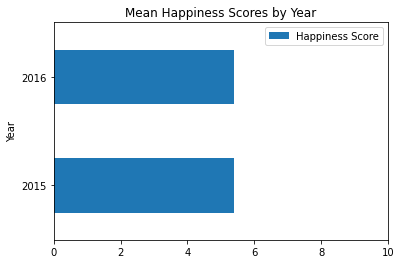

In [71]:
# Plotting the result
means.plot(kind='barh', title='Mean Happiness Scores by Year', xlim=(0,10))

Result: The mean happiness score across countries increased slightly, but remained almost the same from 2015 to 2016.